#TensorFlow versions in Colab


##Background
Colab has two versions of TensorFlow pre-installed: a 2.x version and a 1.x version. Colab uses TensorFlow 2.x by default, though you can switch to 1.x by the method shown below.


##Specifying the TensorFlow version

Running `import tensorflow` will import the default version (currently 2.x). You can use 1.x by running a cell with the `tensorflow_version` magic **before** you run `import tensorflow`.

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Once you have specified a version via this magic, you can run `import tensorflow` as normal and verify which version was imported as follows:

In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.2


If you want to switch TensorFlow versions after import, you **will need to restart your runtime** with 'Runtime' -> 'Restart runtime...' and then specify the version before you import it again.

## Avoid Using ``pip install`` with GPUs and TPUs

We recommend against using ``pip install`` to specify a particular TensorFlow version for both GPU and TPU backends. Colab builds TensorFlow from source to ensure compatibility with our fleet of accelerators. Versions of TensorFlow fetched from PyPI by ``pip`` may suffer from performance problems or may not work at all.

In [3]:
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

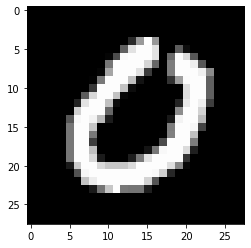

In [4]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

image = mnist.train.images[7].reshape([28, 28])
plt.gray()
plt.imshow(image)

In [6]:
print(mnist.train.images[7].shape)
print(mnist.train.labels[7].shape)

(784,)
(10,)


In [7]:
print(mnist.train.images[7][150: 200])

[0.         0.         0.37254903 0.8862746  0.9921569  0.9921569
 0.8862746  0.         0.         0.36078432 0.0509804  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01960784 0.29803923
 0.97647065 0.9921569  0.9921569  0.9921569  0.8862746  0.
 0.41176474 0.9843138  0.854902   0.34117648 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [8]:
print(mnist.train.labels[: 10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [9]:
learning_rate = 0.1
epochs = 1000
batch_size = 128

n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784 # 28 * 28
num_classes = 10

X = tf.placeholder('float', [None, num_input])
Y = tf.placeholder('float', [None, num_classes])

In [10]:
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'output': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'output': tf.Variable(tf.random_normal([num_classes]))
}

In [14]:
def network(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    output_layer = tf.matmul(layer_2, weights['output'] + biases['output'])
    return output_layer

In [15]:
logits = network(X)

loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=logits, labels=Y
    )
)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={X: batch_x, Y: batch_y})

        if epoch % 50 == 0:
            train_accuracy = sess.run(
                accuracy,
                feed_dict={
                    X: mnist.train.images,
                    Y: mnist.train.labels
                }
            )

            print(f'Epoch #{epoch}: train accuracy = {train_accuracy}')

    print('Test accuracy = {}'.format(
        sess.run(
            accuracy,
            feed_dict={
                X: mnist.train.images,
                Y: mnist.train.labels
            }
        )
    ))

Epoch #0: train accuracy = 0.22592727839946747
Epoch #50: train accuracy = 0.842236340045929
Epoch #100: train accuracy = 0.8506545424461365
Epoch #150: train accuracy = 0.8306182026863098
Epoch #200: train accuracy = 0.850454568862915
Epoch #250: train accuracy = 0.8523091077804565
Epoch #300: train accuracy = 0.848690927028656
Epoch #350: train accuracy = 0.8501818180084229
Epoch #400: train accuracy = 0.8349817991256714
Epoch #450: train accuracy = 0.8502363562583923
Epoch #500: train accuracy = 0.8412545323371887
Epoch #550: train accuracy = 0.8599272966384888
Epoch #600: train accuracy = 0.862854540348053
Epoch #650: train accuracy = 0.838309109210968
Epoch #700: train accuracy = 0.8469454646110535
Epoch #750: train accuracy = 0.8550181984901428
Epoch #800: train accuracy = 0.828709065914154
Epoch #850: train accuracy = 0.8511090874671936
Epoch #900: train accuracy = 0.8393272757530212
Epoch #950: train accuracy = 0.8429999947547913
Test accuracy = 0.8371999859809875


## Keras MNIST

In [19]:
tf.__version__

'1.15.2'

In [20]:
batch_size = 128
num_classes = 10
epochs = 2

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [22]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

_ = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2482 - acc: 0.9249 - val_loss: 0.1016 - val_acc: 0.9686
Epoch 2/2
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1007 - acc: 0.9696 - val_loss: 0.0697 - val_acc: 0.9776


In [23]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.06966012472063303
Test accuracy: 0.9776
